# Buttons notebook

Notebook for testing interactive graphs of matplotlib in the jupyter enviroment.


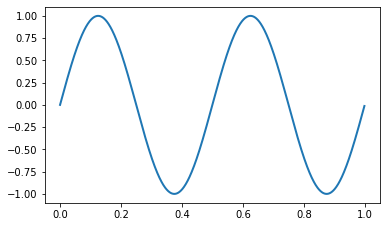

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Button

freqs = np.arange(2, 20, 3)

fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.2)
t = np.arange(0.0, 1.0, 0.001)
s = np.sin(2*np.pi*freqs[0]*t)
l, = plt.plot(t, s, lw=2)

#plt.show()

# defining the buttons action

To each matplotlib button, a callback function must be assigned. 

Here, the ``next`` and ``previous`` method shift the index of an array, and help to visualize the wave with
new frequencies.

For the interactive mode to function, the plotting should be put in the qt mode using `%matplotlib qt`. 
It can be put back into the inline mode by `%matplotlib inline`

In [6]:
%matplotlib qt
ll, = plt.plot(t, s, lw=2)

class Index:
    ind = 0

    def next(self, event):
        self.ind += 1
        i = self.ind % len(freqs)
        ydata = np.sin(2*np.pi*freqs[i]*t)
        ll.set_ydata(ydata)
        plt.draw()

    def prev(self, event):
        self.ind -= 1
        i = self.ind % len(freqs)
        ydata = np.sin(2*np.pi*freqs[i]*t)
        ll.set_ydata(ydata)
        plt.draw()

callback = Index()
axprev = plt.axes([0.7, 0.05, 0.1, 0.075])
axnext = plt.axes([0.81, 0.05, 0.1, 0.075])
bnext = Button(axnext, 'Next')
bnext.on_clicked(callback.next)
bprev = Button(axprev, 'Previous')
bprev.on_clicked(callback.prev)

plt.show()